Participants of Questionnaire 1, who think that the description helps them understand the code are more likely to perceive completing the code as easier after reading it. (this question is not considered, since it measures correlations between two items)

In [ ]:
import scipy.stats as stats
import pandas as pd

In [ ]:
#make sure your data points are normally distributed. In order to determine it, I will use the Shapiro Test.
# collect data about first item: The description helps me understand the given code.
helps_understand = [4,1,4,1,3,2,2,4,4,3,5,2,3,4,1,4,2,2,5,1,2,1,3,1,4,2,1,3,2,1,5,2,3,4,2,3,2,3,4,1,3,4,3,3,5,5,3,5,4,5,5,3,4,3,5,3,3,5,2,1]


statistic_helps, p_value_helps = stats.shapiro(helps_understand)
print("Shapiro-Wilk Test Statistic (Helps Understand):", statistic_helps)
print("P-value (Helps Understand):", p_value_helps)
if p_value_helps > 0.05:
    print("The data for 'Helps Understand' appears to be normally distributed.")
else:
    print("The data for 'Helps Understand' does not appear to be normally distributed.")
#collect data about second item:
easy_to_complete = [3,1,3,3,2,1,2,3,3,3,4,1,2,2,2,4,1,2,5,1,3,1,3,1,3,1,1,2,2,1,3,1,2,2,3,4,3,3,2,1,3,4,3,3,4,5,3,5,4,5,5,3,5,3,5,4,2,5,5,3]

statistic_easy, p_value_easy = stats.shapiro(easy_to_complete)
print("Shapiro-Wilk Test Statistic (Easy to Complete):", statistic_easy)
print("P-value (Easy to Complete):", p_value_easy)
if p_value_easy > 0.05:
    print("The data for 'Easy to Complete' appears to be normally distributed.")
else:
    print("The data for 'Easy to Complete' does not appear to be normally distributed.")

Shapiro-Wilk Test Statistic (Helps Understand): 0.905468761920929
P-value (Helps Understand): 0.00020938125089742243
The data for 'Helps Understand' does not appear to be normally distributed.
Shapiro-Wilk Test Statistic (Easy to Complete): 0.8963343501091003
P-value (Easy to Complete): 9.69668835750781e-05
The data for 'Easy to Complete' does not appear to be normally distributed.


After determining, that my data points for both items of interest are not normally distributed, I will have to apply a non-parametric hypothesis test.
A suitable non-parametric test to consider instead of Pearson correlation is the Spearman's rank correlation coefficient.
Spearman's correlation assesses the strength and direction of the monotonic relationship between two variables, and it does not assume a specific distribution for the data.

In [ ]:
# Perform Spearman's rank correlation
correlation_coefficient, p_value = stats.spearmanr(helps_understand, easy_to_complete)

# Print the results
print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("There is no significant correlation between the two variables.")
else:
    print("There is a significant correlation between the two variables.")

Spearman's Rank Correlation Coefficient: 0.7180809850577754
P-value: 1.0604561515049804e-10
There is a significant correlation between the two variables.


 Result: There is a significant correlation between the two variables.
 Higher agreement with the statement "The description helps me understand the given code" is positively correlated with higher agreement with the statement "After reading the description, it is easy to complete the code."

In [ ]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Masterarbeit/Questionnaires_answers.xlsx'
sheet_quest_1 = "Questionnaire_1_cla_discord"
sheet_quest_2 = "Questionnaire_2_cla_discord"
# Read Excel file
excel_file = pd.ExcelFile(excel_file_path)

#sheet for questionnaire 1
df_1 = excel_file.parse(sheet_quest_1)

#sheet for questionnaire 2
df_2 = excel_file.parse(sheet_quest_2)

item_data_collection = {}

#AST-story green
#collect all likert scale based questionnaire items
def collect_likert_scale_item_values(df, quest, story_order, last_line):

  for col_index in range(4, 18):

      col_name = df.columns[col_index]

      item = col_name.split(". ", 1)[0]
      item_scores = df.iloc[0:last_line, col_index].dropna().tolist()
      item_data_collection[f"item_{item}_quest{quest}_{story_order[0]}"] = list(map(int, item_scores))

  #GPT-story orange
  for col_index in range(20, 34):

      col_name = df.columns[col_index]

      item = col_name.split(". ", 1)[0]
      item_scores = df.iloc[0:last_line, col_index].dropna().tolist()
      item_data_collection[f"item_{item}_quest{quest}_{story_order[1]}"] = list(map(int, item_scores))

  #PSEUDO blue
  for col_index in range(36, 50):

      col_name = df.columns[col_index]

      item = col_name.split(". ", 1)[0]
      item_scores = df.iloc[0:last_line, col_index].dropna().tolist()
      item_data_collection[f"item_{item}_quest{quest}_{story_order[2]}"] = list(map(int, item_scores))
collect_likert_scale_item_values(df_1, "1", ["ast", "gpt", "pseudo"],25)
collect_likert_scale_item_values(df_2, "2", ["pseudo", "ast", "gpt"],21)

#store numerical values for item 2

# Function to retrieve concept points
def retrieve_item2_points(selected_data):
    local_result = []
    for value in selected_data:
        if isinstance(value, str):  # Check if the value is a string and not NaN
            parts = value.split("=")
            if len(parts) == 2:
                second_part = parts[1].strip()
                second_part_parts = second_part.split("/")
                if len(second_part_parts) >= 1:
                    local_result.append(int(second_part_parts[0].strip()))
    return local_result

item_2_values_quest1_ast = df_1.iloc[0:25, 3]
item_2_values_quest1_gpt = df_1.iloc[0:25, 19]
item_2_values_quest1_pseudo = df_1.iloc[0:25, 35]

item_2_values_quest2_pseudo = df_2.iloc[0:21, 3]
item_2_values_quest2_ast = df_2.iloc[0:21, 19]
item_2_values_quest2_gpt = df_2.iloc[0:21, 35]

# Retrieve concept points for each selected data
item_data_collection["item_2_quest1_ast"] = retrieve_item2_points(item_2_values_quest1_ast)
item_data_collection["item_2_quest1_gpt"] = retrieve_item2_points(item_2_values_quest1_gpt)
item_data_collection["item_2_quest1_pseudo"] = retrieve_item2_points(item_2_values_quest1_pseudo)
item_data_collection["item_2_quest2_pseudo"] = retrieve_item2_points(item_2_values_quest2_pseudo)
item_data_collection["item_2_quest2_ast"] = retrieve_item2_points(item_2_values_quest2_ast)
item_data_collection["item_2_quest2_gpt"] = retrieve_item2_points(item_2_values_quest2_gpt)


print(item_data_collection.keys())
#design of keys in dictionary item_{item}_quest{quest}_{story_order[2]}


dict_keys(['item_3_quest1_ast', 'item_4_quest1_ast', 'item_5_quest1_ast', 'item_6_quest1_ast', 'item_7_quest1_ast', 'item_8_quest1_ast', 'item_9_quest1_ast', 'item_10_quest1_ast', 'item_11_quest1_ast', 'item_12_quest1_ast', 'item_13_quest1_ast', 'item_14_quest1_ast', 'item_15_quest1_ast', 'item_16_quest1_ast', 'item_3_quest1_gpt', 'item_4_quest1_gpt', 'item_5_quest1_gpt', 'item_6_quest1_gpt', 'item_7_quest1_gpt', 'item_8_quest1_gpt', 'item_9_quest1_gpt', 'item_10_quest1_gpt', 'item_11_quest1_gpt', 'item_12_quest1_gpt', 'item_13_quest1_gpt', 'item_14_quest1_gpt', 'item_15_quest1_gpt', 'item_16_quest1_gpt', 'item_3_quest1_pseudo', 'item_4_quest1_pseudo', 'item_5_quest1_pseudo', 'item_6_quest1_pseudo', 'item_7_quest1_pseudo', 'item_8_quest1_pseudo', 'item_9_quest1_pseudo', 'item_10_quest1_pseudo', 'item_11_quest1_pseudo', 'item_12_quest1_pseudo', 'item_13_quest1_pseudo', 'item_14_quest1_pseudo', 'item_15_quest1_pseudo', 'item_16_quest1_pseudo', 'item_3_quest2_pseudo', 'item_4_quest2_pseud

In [ ]:
data = {
    'ast': {
        'easy': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest1_ast', 'item_6_quest1_ast', 'item_8_quest1_ast', 'item_9_quest1_ast', 'item_10_quest1_ast', 'item_12_quest1_ast', 'item_13_quest1_ast']},
            'aesthetics': {k[:5]: item_data_collection[k] for k in ['item_3_quest1_ast', 'item_5_quest1_ast', 'item_7_quest1_ast', 'item_11_quest1_ast', 'item_14_quest1_ast', 'item_15_quest1_ast', 'item_16_quest1_ast']}
        },
        'complex': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest2_ast', 'item_6_quest2_ast', 'item_8_quest2_ast', 'item_9_quest2_ast', 'item_10_quest2_ast', 'item_12_quest2_ast', 'item_13_quest2_ast']},
            'aesthetics': {k[:6]: item_data_collection[k] for k in ['item_3_quest2_ast', 'item_5_quest2_ast', 'item_7_quest2_ast', 'item_11_quest2_ast', 'item_14_quest2_ast', 'item_15_quest2_ast', 'item_16_quest2_ast']}
        }
    },
    'gpt': {
        'easy': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest1_gpt', 'item_6_quest1_gpt', 'item_8_quest1_gpt', 'item_9_quest1_gpt', 'item_10_quest1_gpt', 'item_12_quest1_gpt', 'item_13_quest1_gpt']},
            'aesthetics': {k[:5]: item_data_collection[k] for k in ['item_3_quest1_gpt', 'item_5_quest1_gpt', 'item_7_quest1_gpt', 'item_11_quest1_gpt', 'item_14_quest1_gpt', 'item_15_quest1_gpt', 'item_16_quest1_gpt']}
        },
        'complex': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest2_gpt', 'item_6_quest2_gpt', 'item_8_quest2_gpt', 'item_9_quest2_gpt', 'item_10_quest2_gpt', 'item_12_quest2_gpt', 'item_13_quest2_gpt']},
            'aesthetics': {k[:6]: item_data_collection[k] for k in ['item_3_quest2_gpt', 'item_5_quest2_gpt', 'item_7_quest2_gpt', 'item_11_quest2_gpt', 'item_14_quest2_gpt', 'item_15_quest2_gpt', 'item_16_quest2_gpt']}
        }
    },
    'pseudo': {
        'easy': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest1_pseudo', 'item_6_quest1_pseudo', 'item_8_quest1_pseudo', 'item_9_quest1_pseudo', 'item_10_quest1_pseudo', 'item_12_quest1_pseudo', 'item_13_quest1_pseudo']},
            'aesthetics': {k[:6]: item_data_collection[k] for k in ['item_3_quest1_pseudo', 'item_5_quest1_pseudo', 'item_7_quest1_pseudo', 'item_11_quest1_pseudo', 'item_14_quest1_pseudo', 'item_15_quest1_pseudo', 'item_16_quest1_pseudo']}
        },
        'complex': {
            'functionality': {k[:6]: item_data_collection[k] for k in ['item_4_quest2_pseudo', 'item_6_quest2_pseudo', 'item_8_quest2_pseudo', 'item_9_quest2_pseudo', 'item_10_quest2_pseudo', 'item_12_quest2_pseudo', 'item_13_quest2_pseudo']},
            'aesthetics': {k[:6]: item_data_collection[k] for k in ['item_3_quest2_pseudo', 'item_5_quest2_pseudo', 'item_7_quest2_pseudo', 'item_11_quest2_pseudo', 'item_14_quest2_pseudo', 'item_15_quest2_pseudo', 'item_16_quest2_pseudo']}
        }
    }
}
print(data["ast"]["complex"]["functionality"])

{'item_4': [1, 2, 5, 3, 4, 5, 5, 3, 5, 2, 4, 5, 5, 2, 4, 2, 5, 5], 'item_6': [3, 2, 3, 1, 1, 1, 2, 2, 4, 2, 1, 2, 5, 1, 3, 1, 3, 2], 'item_8': [1, 2, 3, 4, 2, 1, 4, 3, 3, 1, 1, 2, 5, 1, 4, 3, 3, 2], 'item_9': [1, 3, 1, 4, 1, 1, 4, 3, 3, 1, 1, 3, 5, 2, 4, 4, 3, 3], 'item_1': [3, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 2, 5, 1, 2, 1, 3, 1]}


Function that plots data distribution and tells, whether data points are normally or not normally distributed

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro


def analyse_normal_distribution(data):

  # Plot histogram
  plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
  plt.title('Histogram of Data')
  plt.xlabel('Values')
  plt.ylabel('Frequency')

  # Add a normal distribution curve for comparison
  mu, sigma = np.mean(data), np.std(data)
  x = np.linspace(min(data), max(data), 100)
  y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
  plt.plot(x, y, 'r--', label='Normal Distribution')

  plt.legend()
  plt.show()

  # Perform Shapiro-Wilk test for normality
  stat, p = shapiro(data)
  alpha = 0.05
  if p > alpha:
      print("The data appears to be normally distributed (p =", p, ")")
  else:
      print("The data does not appear to be normally distributed (p =", p, ")")

H2. The more technical the description is, the more likely participants perceive completing the code as easier after reading it.

item 10: The description makes use of a technical language.

item 8: After reading the description, it is easy to complete the code.

Are the data normally distributed? no

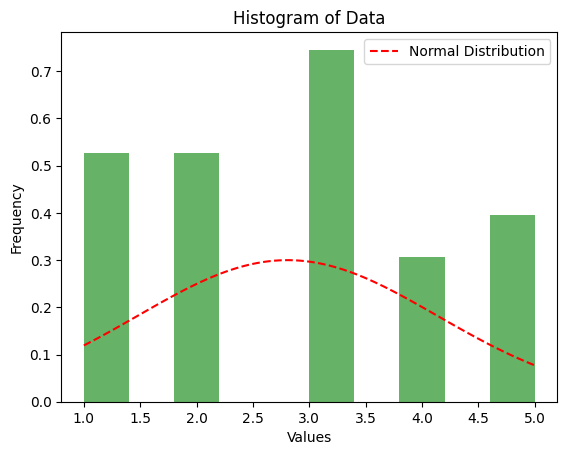

The data does not appear to be normally distributed (p = 0.0001237304968526587 )


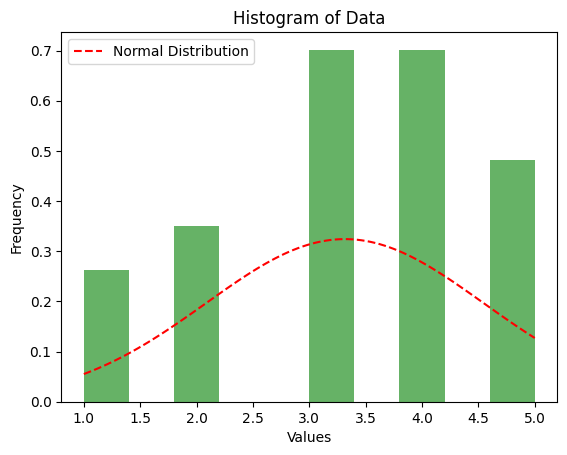

The data does not appear to be normally distributed (p = 0.0002479362301528454 )


(None, None)

In [ ]:
item_10_quest1 = item_data_collection["item_10_quest1_ast"] + item_data_collection["item_10_quest1_gpt"] + item_data_collection["item_10_quest1_pseudo"]
item_8_quest1 = item_data_collection["item_8_quest1_ast"] + item_data_collection["item_8_quest1_gpt"] + item_data_collection["item_8_quest1_pseudo"]

analyse_normal_distribution(item_8_quest1), analyse_normal_distribution(item_10_quest1)

In [ ]:
# Perform Spearman's rank correlation
correlation_coefficient, p_value = stats.spearmanr(item_10_quest1, item_8_quest1)

# Print the results
print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("There is no significant correlation between the two variables.")
else:
    print("There is a significant correlation between the two variables.")

Spearman's Rank Correlation Coefficient: 0.5283252471169009
P-value: 2.3994036531690746e-05
There is a significant correlation between the two variables.


In [ ]:
item_11_quest1 = item_data_collection["item_11_quest1_ast"] + item_data_collection["item_11_quest1_gpt"] + item_data_collection["item_11_quest1_pseudo"]
item_8_quest1 = item_data_collection["item_8_quest1_ast"] + item_data_collection["item_8_quest1_gpt"] + item_data_collection["item_8_quest1_pseudo"]
print(item_11_quest1)
print(item_8_quest1)

# Perform Spearman's rank correlation
correlation_coefficient, p_value = stats.spearmanr(item_11_quest1, item_8_quest1)

# Print the results
print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("There is no significant correlation between the two variables.")
else:
    print("There is a significant correlation between the two variables.")

[5, 3, 1, 2, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 3, 5, 3, 3, 4, 5, 4, 3, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1]
[1, 3, 3, 2, 1, 2, 3, 3, 3, 4, 1, 2, 2, 2, 4, 1, 2, 5, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 3, 1, 2, 2, 3, 4, 3, 3, 2, 1, 4, 3, 3, 4, 5, 3, 5, 4, 5, 5, 3, 5, 3, 5, 4, 2, 5, 5, 3]
Spearman's Rank Correlation Coefficient: -0.4151920475872002
P-value: 0.0013204768802619368
There is a significant correlation between the two variables.


H3. The more concepts the participants recognized in the description, the easier they perceived the code after reading it.

H4. I hypothesize that, in the context of an easy Python code, the description made by the AST Model will receive higher ratings in terms of Functionality compared to the GPT Model's description.
The Zero-Hypothesis: there is no statistically significant difference between the AST and the GPT Stories

From the functionality I will consider all my items (4,6,8,9,10,12,13)

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [127]:
#measure differences between ast and pseudo, both functionality and aesthetics, on easy code
ast_ratings_complex = complex_ast_aesthetics_ratings + complex_ast_functionality_ratings
pseudo_ratings_complex = complex_pseudo_aesthetics_ratings + complex_pseudo_functionality_ratings
gpt_ratings_complex = complex_gpt_aesthetics_ratings + complex_gpt_functionality_ratings

ast_ratings_easy = easy_ast_aesthetics_ratings + easy_ast_functionality_ratings
pseudo_ratings_easy = easy_pseudo_aesthetics_ratings + easy_pseudo_functionality_ratings
gpt_ratings_easy = easy_gpt_aesthetics_ratings + easy_gpt_functionality_ratings
print(ast_ratings_easy)
from scipy.stats import f_oneway

#EASY CODE Aesthetics

f_statistic, p_value = f_oneway(ast_ratings_complex, pseudo_ratings_complex)

alpha = 0.05  # Set your significance level
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference ratings among the models.")


[1, 3, 1, 2, 1, 3, 2, 4, 2, 2, 3, 3, 4, 2, 4, 2, 2, 5, 1, 1, 4, 1, 2, 3, 4, 4, 4, 5, 4, 3, 4, 5, 3, 5, 2, 3, 5, 1, 1, 4, 2, 2, 2, 3, 1, 5, 5, 5, 2, 3, 3, 2, 4, 2, 2, 5, 1, 5, 3, 1, 2, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 3, 1, 3, 3, 2, 3, 4, 2, 5, 3, 4, 3, 2, 4, 3, 4, 4, 3, 5, 1, 5, 3, 2, 1, 3, 5, 2, 5, 4, 4, 2, 4, 4, 4, 4, 5, 4, 5, 1, 1, 3, 4, 2, 4, 5, 3, 4, 5, 4, 2, 3, 4, 4, 4, 4, 4, 5, 1, 1, 4, 4, 5, 5, 2, 5, 5, 5, 4, 2, 5, 2, 5, 5, 5, 3, 4, 2, 1, 4, 1, 2, 1, 1, 2, 4, 1, 4, 1, 2, 3, 2, 4, 1, 2, 5, 1, 1, 3, 3, 2, 1, 2, 3, 3, 3, 4, 1, 2, 2, 2, 4, 1, 2, 5, 1, 1, 4, 1, 3, 2, 2, 4, 4, 3, 5, 2, 3, 4, 1, 4, 2, 2, 5, 1, 1, 4, 2, 3, 4, 1, 2, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 5, 3, 1, 3, 1, 2, 1, 2, 1, 4, 2, 4, 2, 4, 1, 2, 3, 1, 3, 5, 1, 1, 3, 1, 1, 1, 1, 2, 4, 1, 2, 1, 2, 3, 1, 3, 1, 2, 4, 1]
0.044343324949363466
Reject the null hypothesis: There is a significant difference ratings among the models.


In [128]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate((ast_ratings_complex,pseudo_ratings_complex))
group_labels = ['AST'] * len(ast_ratings_complex) + ['PSEUDO'] * len(pseudo_ratings_complex)
tukey_result = pairwise_tukeyhsd(data, group_labels, alpha=0.05)

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   AST PSEUDO    -0.25 0.0443 -0.4937 -0.0063   True
----------------------------------------------------


###Comparison between GPT and AST, easy code

In [ ]:
easy_gpt_functionality_ratings = item_data_collection["item_4_quest1_gpt"] + item_data_collection["item_6_quest1_gpt"] + item_data_collection["item_8_quest1_gpt"] + item_data_collection["item_9_quest1_gpt"] + item_data_collection["item_10_quest1_gpt"] + item_data_collection["item_12_quest1_gpt"]+ item_data_collection["item_13_quest1_gpt"]
easy_ast_functionality_ratings = item_data_collection["item_4_quest1_ast"] + item_data_collection["item_6_quest1_ast"] + item_data_collection["item_8_quest1_ast"] + item_data_collection["item_9_quest1_ast"] + item_data_collection["item_10_quest1_ast"] + item_data_collection["item_12_quest1_ast"]+ item_data_collection["item_13_quest1_ast"]

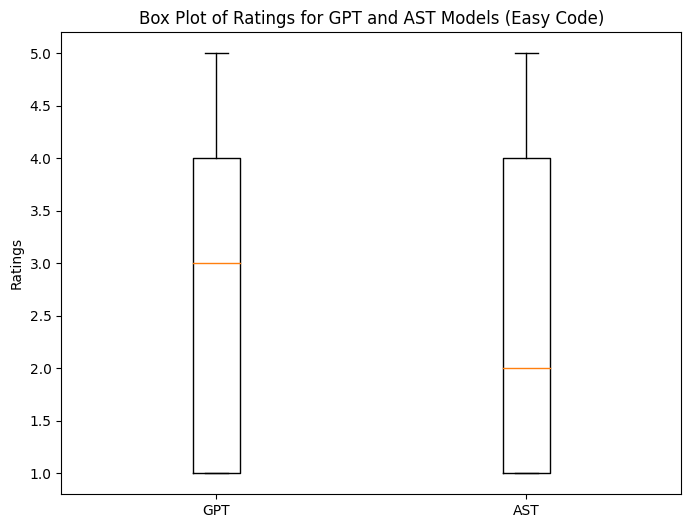

Mann-Whitney U Test p-value: 0.8140
Fail to reject the null hypothesis: No statistically significant difference.


In [ ]:
statistic, p_value = mannwhitneyu(easy_gpt_functionality_ratings, easy_ast_functionality_ratings)

median_diff = np.median(easy_ast_functionality_ratings) - np.median(easy_gpt_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_gpt_functionality_ratings, easy_ast_functionality_ratings], labels=['GPT', 'AST'])
plt.title('Box Plot of Ratings for GPT and AST Models (Easy Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The AST model has a higher median rating than the GPT model.")
    elif median_diff < 0:
        print("The GPT model has a higher median rating than the AST model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

###Comparison between GPT and AST, complex code

In [ ]:
complex_gpt_functionality_ratings = item_data_collection["item_4_quest2_gpt"] + item_data_collection["item_6_quest2_gpt"] + item_data_collection["item_8_quest2_gpt"] + item_data_collection["item_9_quest2_gpt"] + item_data_collection["item_10_quest2_gpt"] + item_data_collection["item_12_quest2_gpt"]+ item_data_collection["item_13_quest2_gpt"]
complex_ast_functionality_ratings = item_data_collection["item_4_quest2_ast"] + item_data_collection["item_6_quest2_ast"] + item_data_collection["item_8_quest2_ast"] + item_data_collection["item_9_quest2_ast"] + item_data_collection["item_10_quest2_ast"] + item_data_collection["item_12_quest2_ast"]+ item_data_collection["item_13_quest2_ast"]

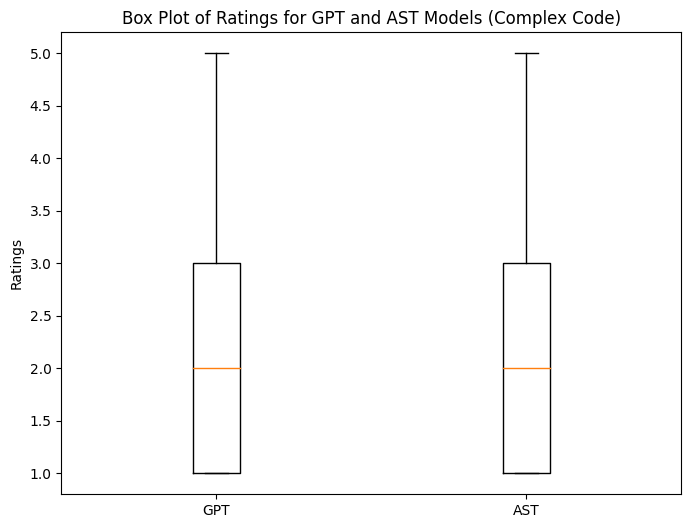

Mann-Whitney U Test p-value: 0.0035
Reject the null hypothesis: There is a statistically significant difference.
The models have the same median rating.


In [ ]:
statistic, p_value = mannwhitneyu(complex_gpt_functionality_ratings, complex_ast_functionality_ratings)

median_diff = np.median(complex_ast_functionality_ratings) - np.median(complex_gpt_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_gpt_functionality_ratings, complex_ast_functionality_ratings], labels=['GPT', 'AST'])
plt.title('Box Plot of Ratings for GPT and AST Models (Complex Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The AST model has a higher median rating than the GPT model.")
    elif median_diff < 0:
        print("The GPT model has a higher median rating than the AST model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

###Comparison between GPT and PSEUDO, complex code



If a model has a higher median, it means that, in a given dataset, the middle value of the scores or measurements for that model is higher than the middle value of the scores for another model or group. The median is a measure of central tendency that represents the value below which half of the data points fall and above which the other half fall.

In the context of comparing two models, a higher median suggests that the model with the higher median is, on average, performing better or receiving higher ratings compared to the other model. However, keep in mind that the median doesn't provide information about the entire distribution or the spread of the data, it only gives you insight into the relative position of the middle value.

In [ ]:
complex_gpt_functionality_ratings = item_data_collection["item_4_quest2_gpt"] + item_data_collection["item_6_quest2_gpt"] + item_data_collection["item_8_quest2_gpt"] + item_data_collection["item_9_quest2_gpt"] + item_data_collection["item_10_quest2_gpt"] + item_data_collection["item_12_quest2_gpt"]+ item_data_collection["item_13_quest2_gpt"]
complex_pseudo_functionality_ratings = item_data_collection["item_4_quest2_pseudo"] + item_data_collection["item_6_quest2_pseudo"] + item_data_collection["item_8_quest2_pseudo"] + item_data_collection["item_9_quest2_pseudo"] + item_data_collection["item_10_quest2_pseudo"] + item_data_collection["item_12_quest2_pseudo"]+ item_data_collection["item_13_quest2_pseudo"]

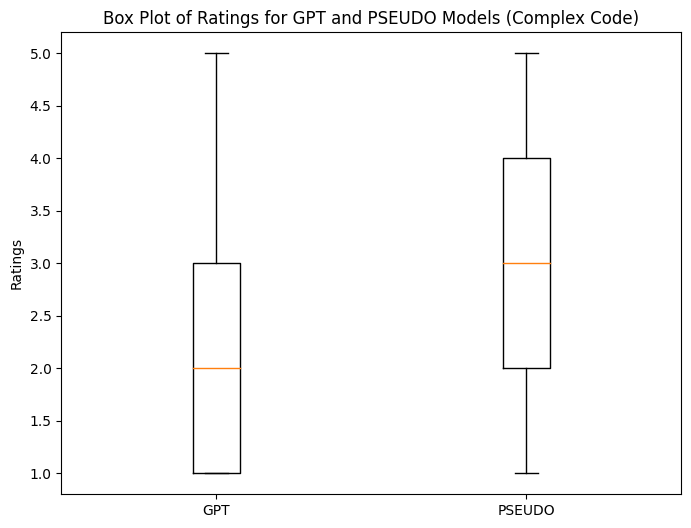

Mann-Whitney U Test p-value: 0.0000
Reject the null hypothesis: There is a statistically significant difference.
The Pseudo model has a higher median rating than the GPT model.


In [ ]:
statistic, p_value = mannwhitneyu(complex_gpt_functionality_ratings, complex_pseudo_functionality_ratings)

median_diff = np.median(complex_pseudo_functionality_ratings) - np.median(complex_gpt_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_gpt_functionality_ratings, complex_pseudo_functionality_ratings], labels=['GPT', 'PSEUDO'])
plt.title('Box Plot of Ratings for GPT and PSEUDO Models (Complex Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The Pseudo model has a higher median rating than the GPT model.")
    elif median_diff < 0:
        print("The GPT model has a higher median rating than the Pseudo model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

###Comparison between AST and PSEUDO, easy code

In [ ]:
easy_pseudo_functionality_ratings = item_data_collection["item_4_quest1_pseudo"] + item_data_collection["item_6_quest1_pseudo"] + item_data_collection["item_8_quest1_pseudo"] + item_data_collection["item_9_quest1_pseudo"] + item_data_collection["item_10_quest1_pseudo"] + item_data_collection["item_12_quest1_pseudo"]+ item_data_collection["item_13_quest1_pseudo"]
easy_ast_functionality_ratings = item_data_collection["item_4_quest1_ast"] + item_data_collection["item_6_quest1_ast"] + item_data_collection["item_8_quest1_ast"] + item_data_collection["item_9_quest1_ast"] + item_data_collection["item_10_quest1_ast"] + item_data_collection["item_12_quest1_ast"]+ item_data_collection["item_13_quest1_ast"]

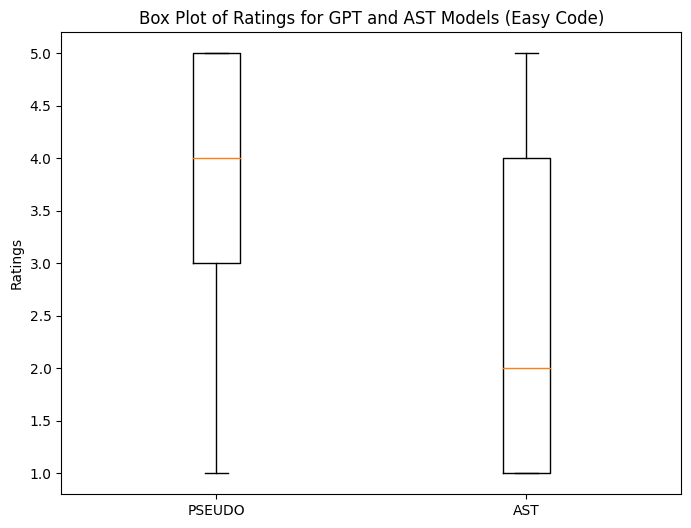

Mann-Whitney U Test p-value: 0.0000
Reject the null hypothesis: There is a statistically significant difference.
The Pseudo model has a higher median rating than the AST model.


In [ ]:
statistic, p_value = mannwhitneyu(easy_pseudo_functionality_ratings, easy_ast_functionality_ratings)

median_diff = np.median(easy_ast_functionality_ratings) - np.median(easy_pseudo_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_pseudo_functionality_ratings, easy_ast_functionality_ratings], labels=['PSEUDO', 'AST'])
plt.title('Box Plot of Ratings for GPT and AST Models (Easy Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The AST model has a higher median rating than the Pseudo model.")
    elif median_diff < 0:
        print("The Pseudo model has a higher median rating than the AST model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

###Comparison between Pseudo and GPT, easy code

In [ ]:
easy_pseudo_functionality_ratings = item_data_collection["item_4_quest1_pseudo"] + item_data_collection["item_6_quest1_pseudo"] + item_data_collection["item_8_quest1_pseudo"] + item_data_collection["item_9_quest1_pseudo"] + item_data_collection["item_10_quest1_pseudo"] + item_data_collection["item_12_quest1_pseudo"]+ item_data_collection["item_13_quest1_pseudo"]
easy_gpt_functionality_ratings = item_data_collection["item_4_quest1_gpt"] + item_data_collection["item_6_quest1_gpt"] + item_data_collection["item_8_quest1_gpt"] + item_data_collection["item_9_quest1_gpt"] + item_data_collection["item_10_quest1_gpt"] + item_data_collection["item_12_quest1_gpt"]+ item_data_collection["item_13_quest1_gpt"]

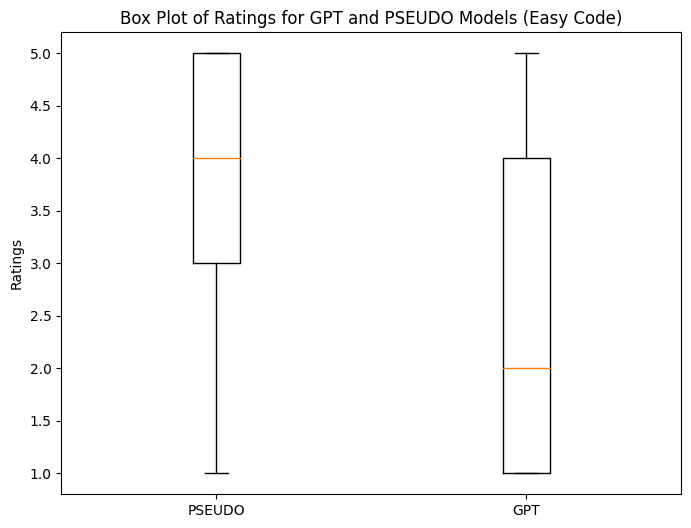

Mann-Whitney U Test p-value: 7.307760555382191e-16
Reject the null hypothesis: There is a statistically significant difference.
The Pseudo model has a higher median rating than the GPT model.


In [ ]:
statistic, p_value = mannwhitneyu(easy_pseudo_functionality_ratings, easy_gpt_functionality_ratings)

median_diff = np.median(easy_ast_functionality_ratings) - np.median(easy_pseudo_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_pseudo_functionality_ratings, easy_ast_functionality_ratings], labels=['PSEUDO', 'GPT'])
plt.title('Box Plot of Ratings for GPT and PSEUDO Models (Easy Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The GPT model has a higher median rating than the Pseudo model.")
    elif median_diff < 0:
        print("The Pseudo model has a higher median rating than the GPT model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

###Comparison AST and Pseudo, complex code

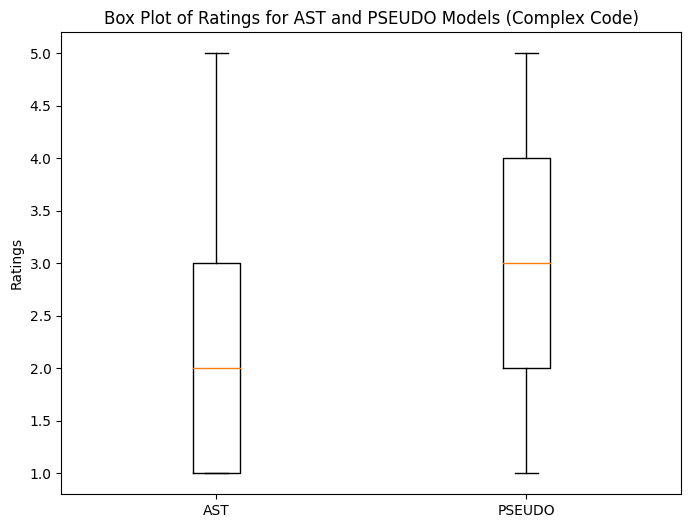

Mann-Whitney U Test p-value: 1.5577495718528214e-05
Reject the null hypothesis: There is a statistically significant difference.
The Pseudo model has a higher median rating than the Ast model.


In [ ]:
complex_ast_functionality_ratings = item_data_collection["item_4_quest2_ast"] + item_data_collection["item_6_quest2_ast"] + item_data_collection["item_8_quest2_ast"] + item_data_collection["item_9_quest2_ast"] + item_data_collection["item_10_quest2_ast"] + item_data_collection["item_12_quest2_ast"]+ item_data_collection["item_13_quest2_ast"]
complex_pseudo_functionality_ratings = item_data_collection["item_4_quest2_pseudo"] + item_data_collection["item_6_quest2_pseudo"] + item_data_collection["item_8_quest2_pseudo"] + item_data_collection["item_9_quest2_pseudo"] + item_data_collection["item_10_quest2_pseudo"] + item_data_collection["item_12_quest2_pseudo"]+ item_data_collection["item_13_quest2_pseudo"]

statistic, p_value = mannwhitneyu(complex_ast_functionality_ratings, complex_pseudo_functionality_ratings)

median_diff = np.median(complex_pseudo_functionality_ratings) - np.median(complex_ast_functionality_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_ast_functionality_ratings, complex_pseudo_functionality_ratings], labels=['AST', 'PSEUDO'])
plt.title('Box Plot of Ratings for AST and PSEUDO Models (Complex Code)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The Pseudo model has a higher median rating than the Ast model.")
    elif median_diff < 0:
        print("The AST model has a higher median rating than the Pseudo model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

In [ ]:
#measure differences between ast and pseudo, both functionality and aesthetics, on easy code
ast_ratings_easy = easy_ast_aesthetics_ratings + easy_ast_
pseudo_ratings_easy

##Measuring Differences according to the construct Story Aesthetics

H4.

Consider only Aesthetics related items: 3,5,7,11,14,15,16

In [ ]:
easy_ast_aesthetics_ratings = item_data_collection["item_3_quest1_ast"] + item_data_collection["item_5_quest1_ast"] + item_data_collection["item_7_quest1_ast"] + item_data_collection["item_11_quest1_ast"] + item_data_collection["item_14_quest1_ast"] + item_data_collection["item_15_quest1_ast"]+ item_data_collection["item_16_quest1_ast"]
easy_gpt_aesthetics_ratings = item_data_collection["item_3_quest1_gpt"] + item_data_collection["item_5_quest1_gpt"] + item_data_collection["item_7_quest1_gpt"] + item_data_collection["item_11_quest1_gpt"] + item_data_collection["item_14_quest1_gpt"] + item_data_collection["item_15_quest1_gpt"]+ item_data_collection["item_16_quest1_gpt"]
easy_pseudo_aesthetics_ratings = item_data_collection["item_3_quest1_pseudo"] + item_data_collection["item_5_quest1_pseudo"] + item_data_collection["item_8_quest1_pseudo"] + item_data_collection["item_9_quest1_pseudo"] + item_data_collection["item_10_quest1_pseudo"] + item_data_collection["item_12_quest1_pseudo"]+ item_data_collection["item_16_quest1_pseudo"]

complex_ast_aesthetics_ratings = item_data_collection["item_3_quest2_ast"] + item_data_collection["item_5_quest2_ast"] + item_data_collection["item_7_quest2_ast"] + item_data_collection["item_11_quest2_ast"] + item_data_collection["item_14_quest2_ast"] + item_data_collection["item_15_quest2_ast"]+ item_data_collection["item_16_quest2_ast"]
complex_gpt_aesthetics_ratings = item_data_collection["item_3_quest2_gpt"] + item_data_collection["item_5_quest2_gpt"] + item_data_collection["item_7_quest2_gpt"] + item_data_collection["item_11_quest2_gpt"] + item_data_collection["item_14_quest2_gpt"] + item_data_collection["item_15_quest2_gpt"]+ item_data_collection["item_16_quest2_gpt"]

complex_pseudo_aesthetics_ratings = item_data_collection["item_3_quest2_pseudo"] + item_data_collection["item_5_quest2_pseudo"] + item_data_collection["item_7_quest2_pseudo"] + item_data_collection["item_11_quest2_pseudo"] + item_data_collection["item_14_quest2_pseudo"] + item_data_collection["item_15_quest2_pseudo"]+ item_data_collection["item_16_quest2_pseudo"]


In [ ]:
gpt_aesthetics = easy_gpt_aesthetics_ratings + complex_gpt_aesthetics_ratings
ast_aesthetics = easy_ast_aesthetics_ratings + complex_ast_aesthetics_ratings
pseudo_aesthetics = easy_pseudo_aesthetics_ratings + complex_pseudo_aesthetics_ratings
print("GPT Aesthetics: ",np.mean(gpt_aesthetics))
print("AST Aesthetics: ", np.mean(ast_aesthetics))
print("PSEUDO Aesthetics: ",np.mean(pseudo_aesthetics))

gpt_functionality = easy_gpt_functionality_ratings + complex_gpt_functionality_ratings
ast_functionality = easy_ast_functionality_ratings + complex_ast_functionality_ratings
pseudo_functionality = easy_pseudo_functionality_ratings + complex_pseudo_functionality_ratings
print("GPT functionality: ",np.mean(gpt_functionality))
print("AST functionality: ", np.mean(ast_functionality))
print("PSEUDO functionality: ",np.mean(pseudo_functionality))
print(pseudo_functionality)


GPT Aesthetics:  3.3667953667953667
AST Aesthetics:  3.5714285714285716
PSEUDO Aesthetics:  2.9806949806949805
GPT functionality:  2.328185328185328
AST functionality:  2.5212355212355213
PSEUDO functionality:  3.6254826254826256


In [ ]:
def mean(data):
  return np.mean(data)

In [ ]:
functionality_items = [4,6,8,9,10,12,13]
aesthetics_items = [3,5,7,11,14,15,16]
from collections import defaultdict
items_means = defaultdict()
models = ["gpt, ast, pseudo"]

same_item_all_models = []
for n in functionality_items:
  for item in item_data_collection:

      if item.startswith(f"item_{n}_quest") and item.endswith("_pseudo"):
        print(item)
        same_item_all_models.append(item_data_collection[item])
        items_means[f"item_{n}"] = round(mean(same_item_all_models),2)
        same_item_all_models = []

print(items_means)

item_4_quest1_pseudo
item_4_quest2_pseudo
item_6_quest1_pseudo
item_6_quest2_pseudo
item_8_quest1_pseudo
item_8_quest2_pseudo
item_9_quest1_pseudo
item_9_quest2_pseudo
item_10_quest1_pseudo
item_10_quest2_pseudo
item_12_quest1_pseudo
item_12_quest2_pseudo
item_13_quest1_pseudo
item_13_quest2_pseudo
defaultdict(None, {'item_4': 4.61, 'item_6': 2.72, 'item_8': 3.22, 'item_9': 3.17, 'item_10': 3.28, 'item_12': 2.94, 'item_13': 2.22})


In [ ]:
#defaultdict(None, {'item_4': 3.72, 'item_6': 2.17, 'item_8': 2.5, 'item_9': 2.61, 'item_10': 1.72, 'item_12': 2.28, 'item_13': 1.94}) ast funct each item mean
#defaultdict(None, {'item_4': 4.61, 'item_6': 2.72, 'item_8': 3.22, 'item_9': 3.17, 'item_10': 3.28, 'item_12': 2.94, 'item_13': 2.22}) pseudo funct each item mean

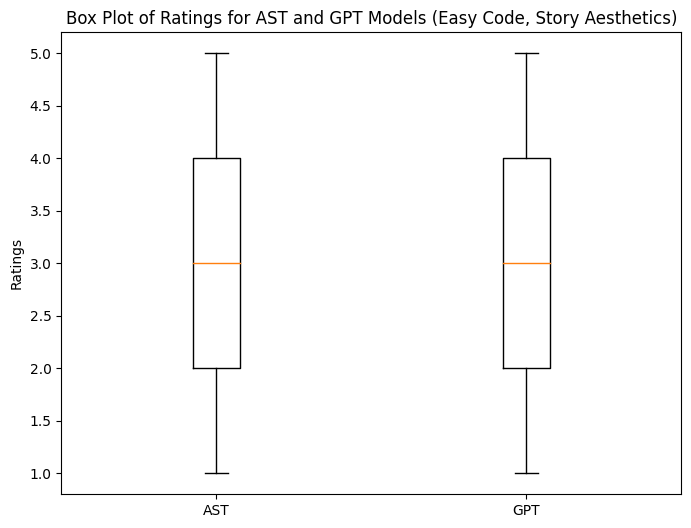

Mann-Whitney U Test p-value: 0.4038912707505322
Fail to reject the null hypothesis: No statistically significant difference.


In [ ]:
#difference between AST and GPT, easy
statistic, p_value = mannwhitneyu(easy_ast_aesthetics_ratings, easy_gpt_aesthetics_ratings)

median_diff = np.median(easy_gpt_aesthetics_ratings) - np.median(easy_ast_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_ast_aesthetics_ratings, easy_gpt_aesthetics_ratings], labels=['AST', 'GPT'])
plt.title('Box Plot of Ratings for AST and GPT Models (Easy Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The GPT model has a higher median rating than the AST model.")
    elif median_diff < 0:
        print("The AST model has a higher median rating than the GPT model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

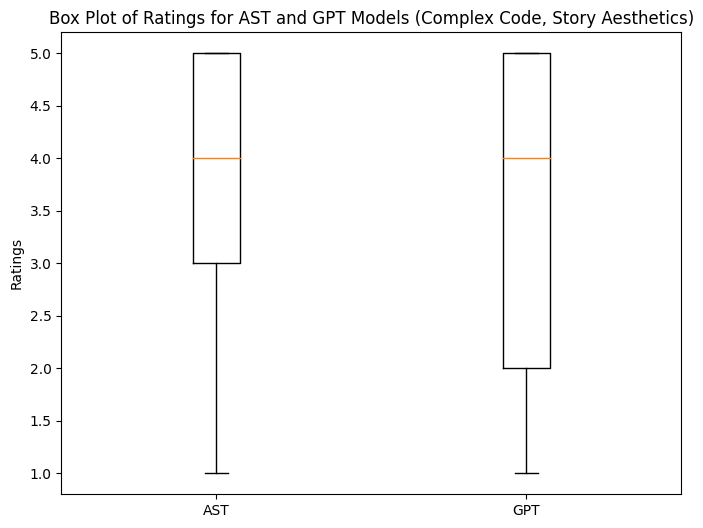

Mann-Whitney U Test p-value: 0.29004448018348383
Fail to reject the null hypothesis: No statistically significant difference.


In [ ]:
#difference between AST and GPT, complex -> no difference
statistic, p_value = mannwhitneyu(complex_ast_aesthetics_ratings, complex_gpt_aesthetics_ratings)

median_diff = np.median(complex_gpt_aesthetics_ratings) - np.median(complex_ast_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_ast_aesthetics_ratings, complex_gpt_aesthetics_ratings], labels=['AST', 'GPT'])
plt.title('Box Plot of Ratings for AST and GPT Models (Complex Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The GPT model has a higher median rating than the AST model.")
    elif median_diff < 0:
        print("The AST model has a higher median rating than the GPT model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

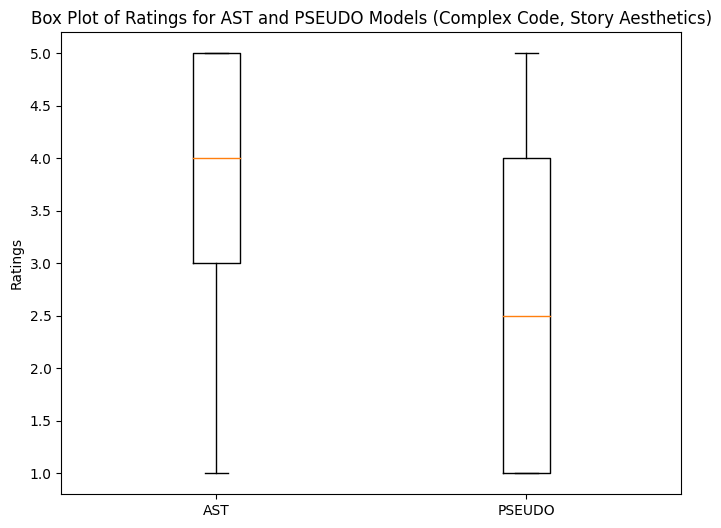

Mann-Whitney U Test p-value: 0.0000
Reject the null hypothesis: There is a statistically significant difference.
The AST model has a higher median rating than the PSEUDO model.


In [ ]:
#difference between AST and Pseudo, complex -> DIFFERENCE!!!!
statistic, p_value = mannwhitneyu(complex_ast_aesthetics_ratings, complex_pseudo_aesthetics_ratings)

median_diff = np.median(complex_pseudo_aesthetics_ratings) - np.median(complex_ast_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_ast_aesthetics_ratings, complex_pseudo_aesthetics_ratings], labels=['AST', 'PSEUDO'])
plt.title('Box Plot of Ratings for AST and PSEUDO Models (Complex Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The PSEUDO model has a higher median rating than the AST model.")
    elif median_diff < 0:
        print("The AST model has a higher median rating than the PSEUDO model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

In [ ]:
#difference between AST and Pseudo, easy -> no difference
statistic, p_value = mannwhitneyu(easy_ast_aesthetics_ratings, easy_pseudo_aesthetics_ratings)

median_diff = np.median(easy_pseudo_aesthetics_ratings) - np.median(easy_ast_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_ast_aesthetics_ratings, easy_pseudo_aesthetics_ratings], labels=['AST', 'PSEUDO'])
plt.title('Box Plot of Ratings for AST and PSEUDO Models (Easy Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The PSEUDO model has a higher median rating than the AST model.")
    elif median_diff < 0:
        print("The AST model has a higher median rating than the PSEUDO model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

In [ ]:
#difference between GPT and Pseudo, easy -> no difference
statistic, p_value = mannwhitneyu(easy_gpt_aesthetics_ratings, easy_pseudo_aesthetics_ratings)

median_diff = np.median(easy_pseudo_aesthetics_ratings) - np.median(easy_gpt_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([easy_gpt_aesthetics_ratings, easy_pseudo_aesthetics_ratings], labels=['GPT', 'PSEUDO'])
plt.title('Box Plot of Ratings for GPT and PSEUDO Models (Easy Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The PSEUDO model has a higher median rating than the GPT model.")
    elif median_diff < 0:
        print("The GPT model has a higher median rating than the PSEUDO model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

In [ ]:
#difference between GPT and Pseudo, complex -> DIFFERENCE!!
statistic, p_value = mannwhitneyu(complex_gpt_aesthetics_ratings, complex_pseudo_aesthetics_ratings)

median_diff = np.median(complex_pseudo_aesthetics_ratings) - np.median(complex_gpt_aesthetics_ratings)
plt.figure(figsize=(8, 6))
plt.boxplot([complex_gpt_aesthetics_ratings, complex_pseudo_aesthetics_ratings], labels=['GPT', 'PSEUDO'])
plt.title('Box Plot of Ratings for GPT and PSEUDO Models (Complex Code, Story Aesthetics)')
plt.ylabel('Ratings')
plt.show()

print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
    if median_diff > 0:
        print("The PSEUDO model has a higher median rating than the GPT model.")
    elif median_diff < 0:
        print("The GPT model has a higher median rating than the PSEUDO model.")
    else:
        print("The models have the same median rating.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")

Perform one-way ANOVA: conduct the ANOVA test to determine if there is a significant difference among the models' Aesthetics ratings.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [ ]:
from scipy.stats import f_oneway

#EASY CODE Aesthetics

f_statistic, p_value = f_oneway(easy_ast_aesthetics_ratings, easy_gpt_aesthetics_ratings)

alpha = 0.05  # Set your significance level
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Functionality ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Functionality ratings among the models.")



0.43129319102616803
Fail to reject the null hypothesis: No significant difference in Functionality ratings among the models.


In [ ]:
from scipy.stats import f_oneway

#EASY CODE Functionality

f_statistic, p_value = f_oneway(easy_ast_functionality_ratings, easy_gpt_functionality_ratings, easy_pseudo_functionality_ratings)

alpha = 0.05  # Set your significance level
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Aesthetics ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Aesthetics ratings among the models.")

1.139638054528583e-21
Reject the null hypothesis: There is a significant difference in Aesthetics ratings among the models.


In [ ]:
#COMPLEX CODE functionality

f_statistic, p_value = f_oneway(complex_ast_functionality_ratings, complex_gpt_functionality_ratings, complex_pseudo_functionality_ratings)

alpha = 0.05  # Set your significance level
print(round(p_value, 6))
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Functionality ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Functionality ratings among the models.")

0.0
Reject the null hypothesis: There is a significant difference in Functionality ratings among the models.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate((easy_ast_functionality_ratings, easy_gpt_functionality_ratings,easy_pseudo_functionality_ratings ))
group_labels = ['AST'] * len(easy_ast_functionality_ratings) + ['GPT'] * len(easy_gpt_functionality_ratings) + ['PSEUDO'] * len(easy_pseudo_functionality_ratings)

tukey_result = pairwise_tukeyhsd(data, group_labels, alpha=0.05)

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   AST    GPT   0.0376 0.9691 -0.3329 0.4081  False
   AST PSEUDO   1.4436    0.0  1.0731 1.8141   True
   GPT PSEUDO    1.406    0.0  1.0355 1.7765   True
---------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate((complex_ast_functionality_ratings, complex_gpt_functionality_ratings, complex_pseudo_functionality_ratings))
group_labels = ['GPT'] * len(complex_ast_functionality_ratings) + ['AST'] * len(complex_gpt_functionality_ratings) + ['Pseudo'] * len(complex_pseudo_functionality_ratings)

tukey_result = pairwise_tukeyhsd(data, group_labels, alpha=0.05)

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   AST    GPT   0.4365 0.0232  0.048 0.8251   True
   AST Pseudo   1.1825    0.0  0.794 1.5711   True
   GPT Pseudo    0.746    0.0 0.3575 1.1346   True
--------------------------------------------------


In [ ]:
#COMPLEX CODE

f_statistic, p_value = f_oneway(complex_ast_aesthetics_ratings, complex_gpt_aesthetics_ratings, complex_pseudo_aesthetics_ratings)

alpha = 0.05  # Set your significance level
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Aesthetics ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Aesthetics ratings among the models.")

1.5845626718158703e-13
Reject the null hypothesis: There is a significant difference in Aesthetics ratings among the models.


After conducting an ANOVA and finding a statistically significant difference among the models, I perform post hoc tests (Tukey's Honestly Significant Difference ) to determine which specific model(s) performed better than the others

In [119]:
from scipy.stats import f_oneway

#EASY CODE Aesthetics

f_statistic, p_value = f_oneway(easy_ast_ratings, easy_gpt_ratings)

alpha = 0.05  # Set your significance level
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Functionality ratings among the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Functionality ratings among the models.")

NameError: ignored

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate((complex_gpt_aesthetics_ratings, complex_ast_aesthetics_ratings, complex_pseudo_aesthetics_ratings))
group_labels = ['GPT'] * len(complex_gpt_aesthetics_ratings) + ['AST'] * len(complex_ast_aesthetics_ratings) + ['Pseudo'] * len(complex_pseudo_aesthetics_ratings)

tukey_result = pairwise_tukeyhsd(data, group_labels, alpha=0.05)

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   AST    GPT  -0.2857 0.1887 -0.6702  0.0988  False
   AST Pseudo   -1.246    0.0 -1.6305 -0.8615   True
   GPT Pseudo  -0.9603    0.0 -1.3448 -0.5758   True
----------------------------------------------------


Interpret my results according to ANOVA and POST HOC test:
AST vs. GPT:

The mean difference between AST and GPT is -0.2857. The p-adj value is 0.1887, which is greater than the significance level (0.05). Therefore, I fail to reject the null hypothesis. This suggests that there is no statistically significant difference in Aesthetics ratings between the AST and GPT models.


AST vs. Pseudo:
The mean difference between AST and Pseudo is -1.246. The p-adj value is 0.0, which is less than the significance level (0.05). Therefore, I reject the null hypothesis. This suggests that there is a statistically significant difference in Aesthetics ratings between the AST and Pseudo models.


GPT vs. Pseudo:
The mean difference between GPT and Pseudo is -0.9603. The p-adj value is 0.0, which is less than the significance level (0.05). Therefore, I reject the null hypothesis. This suggests that there is a statistically significant difference in Aesthetics ratings between the GPT and Pseudo models.

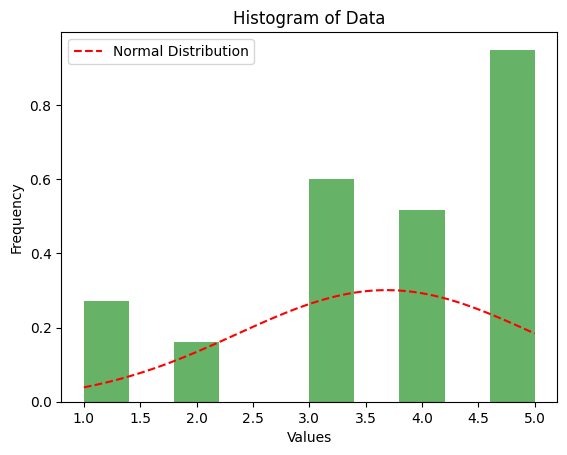

The data does not appear to be normally distributed (p = 4.708960556252075e-16 )


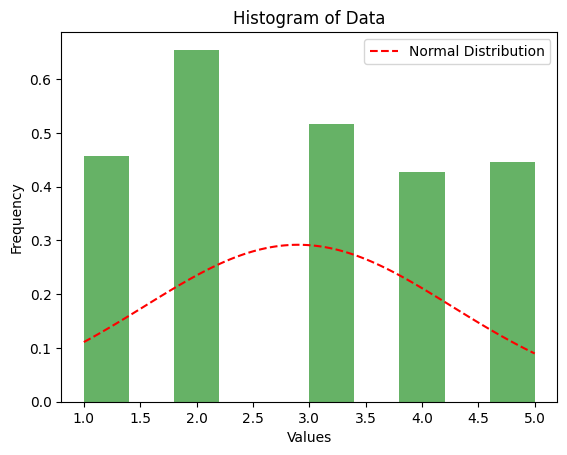

The data does not appear to be normally distributed (p = 2.0296203953606984e-12 )


In [ ]:
easy_pseudo_ratings = easy_pseudo_aesthetics_ratings + easy_pseudo_functionality_ratings
complex_pseudo_ratings = complex_pseudo_aesthetics_ratings + complex_pseudo_functionality_ratings
analyse_normal_distribution(easy_pseudo_ratings) #The data does not appear to be normally distributed (p = 6.576938726095337e-16 )

analyse_normal_distribution(complex_pseudo_ratings) #The data does not appear to be normally distributed (p = 2.0296203953606984e-12 )

In [ ]:
# from scipy.stats import wilcoxon

# statistic_gpt, p_value_gpt = wilcoxon(easy_pseudo_ratings, complex_pseudo_ratings) #2 data points for each item more in easy mode

# alpha = 0.05  # Set your significance level

# if p_value_gpt < alpha:
#     print("For PSEUDO, reject the null hypothesis: There is a significant difference between easy and complex modes.")
# else:
#     print("For PSEUDO, fail to reject the null hypothesis: No significant difference between easy and complex modes.")

# # Repeat the above steps for the other models (AST and Pseudo)


ANOVA mit allen 6 Konditionen considerin both constructs (functionality and aesthetics)

ast - easy code

gpt - easy code

pseudo - easy code


ast - complex code

gpt - complex code

pseudo - complex code


In [ ]:
!pip install pingouin


In [ ]:
import pingouin as pg

In [ ]:
ast_easy = easy_ast_aesthetics_ratings + easy_ast_functionality_ratings
gpt_easy = easy_gpt_aesthetics_ratings + easy_gpt_functionality_ratings
pseudo_easy = easy_pseudo_aesthetics_ratings + easy_pseudo_functionality_ratings
ast_complex = complex_ast_aesthetics_ratings + complex_ast_functionality_ratings
gpt_complex = complex_gpt_aesthetics_ratings + complex_gpt_functionality_ratings
pseudo_complex = complex_pseudo_aesthetics_ratings + complex_pseudo_functionality_ratings

In [ ]:


data = {
    'Condition': ['ast_easy_code'] * 266 + ['gpt_easy_code'] * 266 + ['pseudo_easy_code'] * 266 +
                 ['ast_complex_code'] * 252 + ['gpt_complex_code'] * 252 + ['pseudo_complex_code'] * 252,
    'Value': ast_easy + gpt_easy + pseudo_easy + ast_complex + gpt_complex + pseudo_complex
}

df = pd.DataFrame(data)

# ANOVA
anova = pg.anova(data=df, dv='Value', between='Condition', detailed=True)

In [ ]:
print(df)

                Condition  Value
0           ast_easy_code      3
1           ast_easy_code      1
2           ast_easy_code      3
3           ast_easy_code      1
4           ast_easy_code      2
...                   ...    ...
1591  pseudo_complex_code      2
1592  pseudo_complex_code      4
1593  pseudo_complex_code      1
1594  pseudo_complex_code      2
1595  pseudo_complex_code      2

[1596 rows x 2 columns]


In [ ]:
print(anova)

      Source           SS    DF         MS          F         p-unc      np2
0  Condition   140.466673     5  28.093335  14.235936  1.206764e-13  0.04396
1     Within  3054.838346  1548   1.973410        NaN           NaN      NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate((ast_easy, gpt_easy, pseudo_easy, ast_complex, gpt_complex, pseudo_complex))
group_labels = ['ast_easy'] * len(ast_easy) + ['gpt_easy'] * len(gpt_easy) + ['pseudo_easy'] * len(pseudo_easy) + ['ast_complex'] * len(ast_complex) + ['gpt_complex'] * len(gpt_complex) + ['pseudo_complex'] * len(pseudo_complex)

tukey_result = pairwise_tukeyhsd(data, group_labels, alpha=0.05)

print(tukey_result)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
   ast_complex       ast_easy  -0.2034 0.5671 -0.5558 0.1489  False
   ast_complex    gpt_complex  -0.3611 0.0457 -0.7182 -0.004   True
   ast_complex       gpt_easy  -0.2485 0.3355 -0.6009 0.1038  False
   ast_complex pseudo_complex    -0.25  0.344 -0.6071 0.1071  False
   ast_complex    pseudo_easy   0.5334 0.0002  0.1811 0.8858   True
      ast_easy    gpt_complex  -0.1577 0.7977   -0.51 0.1947  False
      ast_easy       gpt_easy  -0.0451 0.9991 -0.3927 0.3024  False
      ast_easy pseudo_complex  -0.0466  0.999 -0.3989 0.3058  False
      ast_easy    pseudo_easy   0.7368    0.0  0.3893 1.0844   True
   gpt_complex       gpt_easy   0.1126 0.9436 -0.2398 0.4649  False
   gpt_complex pseudo_complex   0.1111 0.9495  -0.246 0.4682  False
   gpt_complex    pseudo_easy   0.8945    0.0  0

DIFFERENCE: Based on the output, I can make the following conclusions:

There is a significant difference between the "ast_complex" and "gpt_complex" groups.
There is a significant difference between the "ast_complex" and "pseudo_easy" groups.
There is a significant difference between the "ast_easy" and "pseudo_easy" groups.
There is a significant difference between the "gpt_complex" and "pseudo_easy" groups.
There is a significant difference between the "gpt_easy" and "pseudo_easy" groups.
In all other cases, there is no significant difference between the groups.

NO-DIFFERENCE: The following comparisons do not show a significant difference (p-adj > 0.05):

ast_complex - ast_easy /
ast_complex - gpt_easy /
ast_complex - pseudo_complex /
ast_easy - gpt_complex /
ast_easy - gpt_easy /
ast_easy - pseudo_complex /
gpt_complex - gpt_easy /
gpt_complex - pseudo_complex /


In [ ]:
def variance(data):
  return np.var(data)
def standarddeviation(data):
  return np.std(data)
def mean(data):
  return np.mean(data)

In [ ]:
print(mean(ast_easy), mean(ast_complex))

2.9473684210526314 3.1507936507936507


In [ ]:
print(mean(ast_easy), mean(ast_complex)) #not a big difference in the mean

2.9473684210526314 3.1507936507936507


In [ ]:
print(mean(ast_complex), mean(gpt_complex))

3.1507936507936507 2.7896825396825395


In [ ]:
print(mean(pseudo_complex), mean(pseudo_easy))

2.9007936507936507 3.6842105263157894


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def box_plot(data, item):

  try:
    mean_value = np.mean(data)
    std_deviation = np.std(data)
    variance = np.var(data)
    median_value = np.median(data)


    plt.boxplot(data)


    plt.scatter(1, mean_value, color='yellow', label='Mean')
    plt.scatter(2, median_value, color='purple', label='Median')
    plt.scatter(3, std_deviation, color='green', label='Standard Deviation')
    plt.scatter(4, np.sqrt(variance), color='violet', label='Variance (sqrt)')


    plt.xticks([1, 2, 3, 4], ['Mean','Median', 'Std Dev', 'Variance'])
    plt.ylabel('Values')
    plt.title(f'{item}: Box Plot with Mean, Median, Standard Deviation, and Variance')
    plt.legend()

    return plt.show()
  except:
    return data
  #plt.savefig(f'{}.png')



In [ ]:
for item in item_data_collection:
  print(box_plot(item_data_collection[item], item))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#I need this to create diagrams for thesis (like the one with all the items)
functionality_items = [4,6,8,9,10,12,13]
aesthetics_items = [3,5,7,11,14,15,16]
from collections import defaultdict
items_means = defaultdict()


same_item_all_models = []
for n in functionality_items:
  for item in item_data_collection:

      if item.startswith(f"item_{n}_quest1_"):

        same_item_all_models.append(item_data_collection[item])
  items_means[f"item_{n}"] = round(mean(same_item_all_models),2)
  same_item_all_models = []

print(items_means)

defaultdict(None, {'item_4': 4.14, 'item_6': 2.93, 'item_8': 2.81, 'item_9': 3.0, 'item_10': 3.32, 'item_12': 3.09, 'item_13': 2.49})


In [ ]:
#defaultdict(None, {'item_4': 4.08, 'item_6': 2.93, 'item_8': 2.82, 'item_9': 3.0, 'item_10': 3.27, 'item_12': 3.1, 'item_13': 2.5})
#defaultdict(None, {'item_4': 4.14, 'item_6': 2.93, 'item_8': 2.81, 'item_9': 3.0, 'item_10': 3.32, 'item_12': 3.09, 'item_13': 2.49})